In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("spam.tsv", sep = "\t")

In [3]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
data.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [4]:
data.isna().sum()

,0
label,0
message,0
length,0
punct,0


In [5]:
data.shape

(5572, 4)

In [6]:
data['label'].value_counts()

,count
label,
ham,4825
spam,747


In [7]:
ham = data[data['label'] == 'ham']
spam = data[data['label'] == 'spam']

In [8]:
ham = ham.sample(spam.shape[0])

In [9]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [10]:
data = pd.concat([ham,spam], ignore_index=True)

In [11]:
data.shape

(1494, 4)

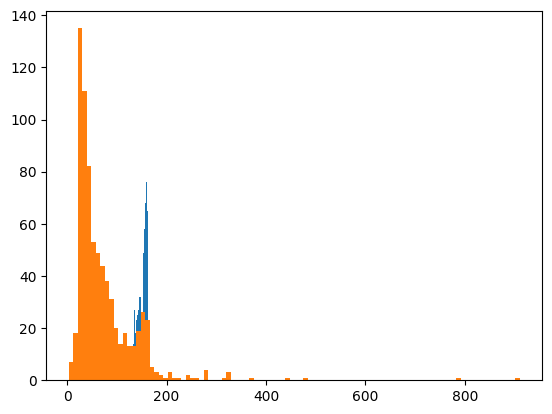

In [12]:
plt.hist(data[data['label'] == "spam"]['length'], bins = 100)
plt.hist(data[data['label'] == "ham"]['length'],bins = 100)
plt.show()

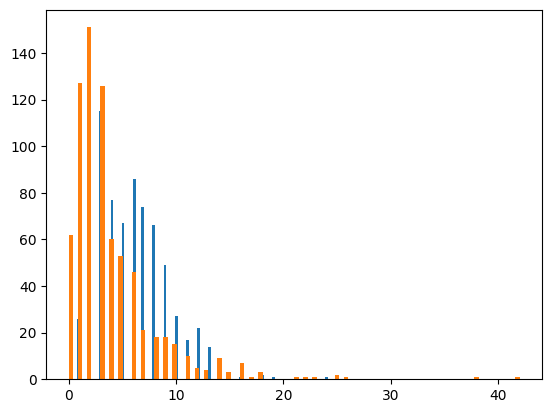

In [ ]:
plt.hist(data[data['label'] == "spam"]['punct'], bins = 100)
plt.hist(data[data['label'] == "ham"]['punct'],bins = 100)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state=0)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1045,), (449,), (1045,), (449,))

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline

In [17]:
classifier = Pipeline([('tfid',TfidfVectorizer()),('classifier',RandomForestClassifier(n_estimators=100))])

In [18]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [21]:
accuracy_score(y_test, y_pred)

0.9420935412026726

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       227
        spam       0.99      0.89      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [23]:
confusion_matrix(y_test, y_pred)

array([[226,   1],
       [ 25, 197]])

In [24]:
from sklearn.svm import SVC

In [31]:
svm = Pipeline([('tfid',TfidfVectorizer()),('classifier',SVC(random_state=0))])

In [32]:
svm.fit(X_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('classifier', SVC(random_state=0))])

In [33]:
y_pred = svm.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred)

0.9665924276169265

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.95      0.99      0.97       227
        spam       0.99      0.94      0.97       222

    accuracy                           0.97       449
   macro avg       0.97      0.97      0.97       449
weighted avg       0.97      0.97      0.97       449



In [36]:
confusion_matrix(y_test, y_pred)

array([[225,   2],
       [ 13, 209]])

In [44]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [45]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [46]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
